In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
from pathlib import Path

# check if workding_dir is in local variables
if "workding_dir" not in locals():
    workding_dir = str(Path.cwd().parent)

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/papers/maritime/global-incidents


In [2]:
# First, load the uploaded CSV file
import pandas as pd

data_path = "data/all_port_labelled.csv"
data = pd.read_csv(data_path)

# Display the first few rows of the dataframe and its summary statistics to get an initial understanding
data_head = data.head()
data_info = data.info()
data_description = data.describe(include="all")

data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       5780 non-null   float64
 1   Index                            5780 non-null   float64
 2   Unnamed: 0.1                     5780 non-null   float64
 3   Headline                         5781 non-null   object 
 4   Details                          5781 non-null   object 
 5   Severity                         5780 non-null   object 
 6   Category                         5780 non-null   object 
 7   Region                           5780 non-null   object 
 8   Datetime                         5780 non-null   object 
 9   Year                             5781 non-null   float64
 10  lat                              3882 non-null   float64
 11  lon                              3882 non-null   float64
 12  Headline_Description

In [3]:
data_description

Unnamed: 0         Index   Unnamed: 0.1  \
count   5780.000000   5780.000000    5780.000000   
unique          NaN           NaN            NaN   
top             NaN           NaN            NaN   
freq            NaN           NaN            NaN   
mean    2889.500000  15762.303287  113709.500865   
std     1668.686609   9078.052678   72963.703513   
min        0.000000      8.000000      34.000000   
25%     1444.750000   8397.000000   50904.500000   
50%     2889.500000  15128.500000  101580.500000   
75%     4334.250000  21700.750000  157966.750000   
max     5779.000000  35421.000000  299524.000000   

                               Headline  \
count                              5781   
unique                             5683   
top     No congestion at Port of Manila   
freq                                  6   
mean                                NaN   
std                                 NaN   
min                                 NaN   
25%                                 NaN   
50%                                 NaN   
75%                                 NaN   
max                                 NaN   

                                                  Details  Severity  \
count                                                5781      5780   
unique                                               5751         4   
top     Updated media sources indicated on December 4 ...  Moderate   
freq                                                    3      2840   
mean                                                  NaN       NaN   
std                                                   NaN       NaN   
min                                                   NaN       NaN   
25%                                                   NaN       NaN   
50%                                                   NaN       NaN   
75%                                                   NaN       NaN   
max                                                   NaN       NaN   

               Category Region       Datetime         Year  ...           IT  \
count              5780   5780           5780  5781.000000  ...  3073.000000   
unique              857    111           5725          NaN  ...          NaN   
top     Port Congestion  China  12/6/20 14:40          NaN  ...          NaN   
freq                710    820              3          NaN  ...          NaN   
mean                NaN    NaN            NaN  2018.935997  ...     0.071266   
std                 NaN    NaN            NaN    26.568532  ...     0.257310   
min                 NaN    NaN            NaN     0.000000  ...     0.000000   
25%                 NaN    NaN            NaN  2019.000000  ...     0.000000   
50%                 NaN    NaN            NaN  2019.000000  ...     0.000000   
75%                 NaN    NaN            NaN  2020.000000  ...     0.000000   
max                 NaN    NaN            NaN  2020.000000  ...     1.000000   

                 EP          NEW          CSD          RPE           MN  \
count   3073.000000  3073.000000  3073.000000  3073.000000  3073.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean       0.008786     0.198178     0.007810     0.034494     0.061829   
std        0.093337     0.398692     0.088043     0.182524     0.240884   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%        0.000000     0.000000     0.000000     0.000000     0.000000   
50%        0.000000     0.000000     0.000000     0.000000     0.000000   
75%        0.000000     0.000000     0.000000     0.000000     0.000000   
max        1.000000     1.000000     1.000000     1.000000     1.000000   

                 NM if_labeled        Month         Week  
count   3073.000000       5778  5778.000000  5778.000000  
unique          NaN          2    

In [4]:
# Calculate missing values count and percentage for each column
missing_values_count = data.isnull().sum()
missing_values_percentage = (missing_values_count / len(data)) * 100

# Combine count and percentage into a dataframe for easier reading
missing_values_df = pd.DataFrame(
    {
        "Missing Values": missing_values_count,
        "Percentage (%)": missing_values_percentage,
    }
)

missing_values_df.sort_values(by="Missing Values", ascending=False)

Missing Values  Percentage (%)
Category 5                                 5782      100.000000
Category 4                                 5781       99.982705
Category 3                                 5676       98.166724
Category 2                                 5145       88.983051
Category 1                                 2709       46.852300
VD                                         2709       46.852300
VA                                         2709       46.852300
MPT                                        2709       46.852300
PC                                         2709       46.852300
PDC                                        2709       46.852300
PCA                                        2709       46.852300
CDL                                        2709       46.852300
Original Category                          2709       46.852300
EP                                         2709       46.852300
NEW                                        2709       46.852300
CSD                                        2709       46.852300
RPE                                        2709       46.852300
MN                                         2709       46.852300
NM                                         2709       46.852300
IT                                         2709       46.852300
lon                                        1900       32.860602
lat                                        1900       32.860602
if_labeled                                    4        0.069180
Month                                         4        0.069180
Week                                          4        0.069180
contains_port_info                            4        0.069180
found_ports                                   4        0.069180
Index                                         2        0.034590
Unnamed: 0.1                                  2        0.034590
Severity                                      2        0.034590
Category                                      2        0.034590
Region                                        2        0.034590
Datetime                                      2        0.034590
Unnamed: 0                                    2        0.034590
maritime_label                                1        0.017295
found_words2                                  1        0.017295
Headline_Description                          1        0.017295
Year                                          1        0.017295
maritime_label2                               1        0.017295
found_words3                                  1        0.017295
Details                                       1        0.017295
Headline                                      1        0.017295
found_words                                   1        0.017295
maritime_label3                               0        0.000000
all_found_words                               0        0.000000
banned_words_but_still_maritime               0        0.000000

In [5]:
columns_to_keep = ["lat", "lon"]
columns_to_drop = missing_values_percentage[
    (missing_values_percentage > 30)
    & (~missing_values_percentage.index.isin(columns_to_keep))
].index

# Now drop the columns except for the ones we want to keep
data_cleaned = data.drop(columns=columns_to_drop)

# Display the columns remaining after dropping
print(data_cleaned.columns)

Index(['Unnamed: 0', 'Index', 'Unnamed: 0.1', 'Headline', 'Details',
       'Severity', 'Category', 'Region', 'Datetime', 'Year', 'lat', 'lon',
       'Headline_Description', 'found_words', 'maritime_label', 'found_words2',
       'maritime_label2', 'found_words3', 'maritime_label3', 'all_found_words',
       'banned_words_but_still_maritime', 'found_ports', 'contains_port_info',
       'if_labeled', 'Month', 'Week'],
      dtype='object')


In [6]:
# Drop the specified columns
data_cleaned = data_cleaned.drop(
    columns=[
        "Unnamed: 0",
        "Index",
        "Unnamed: 0.1",
        "Headline_Description",
        "found_words",
        "found_words2",
        "maritime_label2",
        "found_words3",
        "maritime_label3",
        "all_found_words",
        "banned_words_but_still_maritime",
    ]
)

# Create a new 'id' column starting from 1
data_cleaned["id"] = range(1, len(data_cleaned) + 1)

# Optionally, if you want 'id' to be the first column, you can rearrange the columns like this:
cols = ["id"] + [col for col in data_cleaned.columns if col != "id"]
data_cleaned = data_cleaned[cols]

In [7]:
data_cleaned["maritime_label"] = data_cleaned["maritime_label"].apply(
    lambda x: x if pd.isna(x) else x == "TRUE"
)

In [8]:
data_cleaned["Headline_Details"] = (
    data_cleaned["Headline"] + " " + data_cleaned["Details"]
)

# Now, the DataFrame `data_cleaned` has a new column 'Headline_Details' combining the texts

In [9]:
data_cleaned.to_csv("data/cleaned_data-1.csv", index=False)

In [10]:
df = pd.read_csv("data/cleaned_data.csv")
# Set 'id' column to index + 1
df["id"] = data_cleaned.index + 1

# Display the updated DataFrame
df.head()

id                                           Headline  \
0   1  Grasberg Mine- Grasberg mine workers extend st...   
1   2  Indonesia: Undersea internet cables damaged by...   
2   3  Shanghai port congestion impacts terminals in ...   
3   4  UPDATE - Indonesia: Explosion at KP Terminal i...   
4   5  UPDATE - Indonesia: Police confirm two explosi...   

                                             Details  Severity  \
0  Media sources indicate that workers at the Gra...  Moderate   
1  News sources are stating that recent typhoons ...     Minor   
2  The persisting port congestion at Shanghai’s Y...     Minor   
3  Updated local media sources from Jakarta indic...   Extreme   
4  According to local police in Jakarta, two expl...   Extreme   

                     Category     Region       Datetime    Year       lat  \
0         Mine Workers Strike  Indonesia  28/5/17 17:08  2017.0  -4.05608   
1              Travel Warning  Indonesia   4/9/17 14:30  2017.0       NaN   
2             Port Congestion      China   27/4/17 9:16  2017.0  29.52000   
3  Bombing, Police Operations  Indonesia  24/5/17 15:15  2017.0  -6.22465   
4  Bombing, Police Operations  Indonesia  24/5/17 16:20  2017.0       NaN   

         lon maritime_label                        found_ports  \
0  137.11302          False                       ['freeport']   
1        NaN          False                      ['hong kong']   
2  121.33190           True  ['ningbo', 'qingdao', 'shanghai']   
3  106.86700           True                        ['jakarta']   
4        NaN           True                        ['jakarta']   

   contains_port_info if_labeled  Month  Week  \
0                 1.0      False    5.0  21.0   
1                 1.0      False    4.0  14.0   
2                 1.0      False    4.0  17.0   
3                 1.0      False    5.0  21.0   
4                 1.0       True    5.0  21.0   

                                    Headline_Details  
0  Grasberg Mine- Grasberg mine workers extend st...  
1  Indonesia: Undersea internet cables damaged by...  
2  Shanghai port congestion impacts terminals in ...  
3  UPDATE - Indonesia: Explosion at KP Terminal i...  
4  UPDATE - Indonesia: Police confirm two explosi...

In [11]:
df.to_csv("data/cleaned_data-2.csv", index=False)

In [12]:
# 1. Compare shapes
print("Shape of original DataFrame:", df.shape)
print("Shape of cleaned DataFrame:", data_cleaned.shape)

# 2. Compare columns
print("\nColumns in original DataFrame:", df.columns.tolist())
print("Columns in cleaned DataFrame:", data_cleaned.columns.tolist())

# # 3. Compare data
# # Find rows that are in df but not in data_cleaned
# diff_df_to_cleaned = pd.concat([df, data_cleaned]).drop_duplicates(keep=False)

# # Find rows that are in data_cleaned but not in df
# diff_cleaned_to_df = pd.concat([data_cleaned, df]).drop_duplicates(keep=False)

# print("\nRows in original DataFrame but not in cleaned DataFrame:")
# print(diff_df_to_cleaned)

# print("\nRows in cleaned DataFrame but not in original DataFrame:")
# print(diff_cleaned_to_df)

# 4. Compare specific columns (if needed)
# Example: Compare a specific column 'column_name'
for column in df.columns:
    if column in data_cleaned.columns:
        diff_column = df[column].compare(data_cleaned[column])
        if not diff_column.empty:
            print("\nDifferences in '{}' column:".format(column))
            print(diff_column)

Shape of original DataFrame: (5782, 17)
Shape of cleaned DataFrame: (5782, 17)

Columns in original DataFrame: ['id', 'Headline', 'Details', 'Severity', 'Category', 'Region', 'Datetime', 'Year', 'lat', 'lon', 'maritime_label', 'found_ports', 'contains_port_info', 'if_labeled', 'Month', 'Week', 'Headline_Details']
Columns in cleaned DataFrame: ['id', 'Headline', 'Details', 'Severity', 'Category', 'Region', 'Datetime', 'Year', 'lat', 'lon', 'maritime_label', 'found_ports', 'contains_port_info', 'if_labeled', 'Month', 'Week', 'Headline_Details']

Differences in 'Headline' column:
     self                other
5079  NaN  Regulatory Advisory

Differences in 'Details' column:
     self other
5079  NaN    NM

Differences in 'Severity' column:
       self other
5079  FALSE   NaN
5081   TRUE   NaN

Differences in 'Category' column:
     self other
5079    7   NaN
5081   11   NaN

Differences in 'Region' column:
     self other
5079   28   NaN
5081   48   NaN

Differences in 'Datetime' column:


In [29]:
# data = pd.read_csv("data/cleaned_data.csv")
data = data_cleaned

### Use the cleaned dataset for understanding key variables 

#### Understanding 'Region'


In [30]:
data["Region"].value_counts()

Region
China                               820
United States                       721
Australia                           378
United Kingdom                      346
South Africa                        257
                                   ... 
Guinea                                1
Nicaragua                             1
Norway                                1
Djibouti                              1
Lao People's Democratic Republic      1
Name: count, Length: 111, dtype: int64

In [31]:
data["Region"].unique()

array(['Indonesia', 'China', 'Argentina', 'Philippines', 'United States',
       'United Kingdom', 'Taiwan', 'South Africa', 'Italy', 'Spain',
       'Brazil', 'France', 'Ecuador', 'Chile',
       'Venezuela (Bolivarian Republic of)', 'Mexico', 'Australia',
       'India', 'Singapore', 'Bangladesh', 'Greece', 'Colombia',
       'Republic of Korea', 'Saudi Arabia', 'Morocco', 'Germany',
       'Sri Lanka', 'Malta', 'Japan', 'Bolivia (Plurinational State of)',
       'Belgium', 'Canada', 'Malaysia', 'Denmark', 'New Zealand',
       'Pakistan', 'Nepal', 'Peru', 'United Arab Emirates', 'Netherlands',
       'Tunisia', 'Lithuania', 'Djibouti', 'Egypt', 'Algeria', 'Russia',
       'Thailand', 'Hong Kong', 'Panama', 'Viet Nam', 'Turkey', 'Brunei',
       'Iran (Islamic Republic of)', 'Jamaica', 'Uganda', 'Macau', 'Oman',
       'Puerto Rico', 'Costa Rica', 'Poland',
       'United Republic of Tanzania', 'Bahamas, The', 'Nigeria',
       'Ireland', 'Cambodia', 'Jordan', 'Sweden', 'Guinea', 'Ho

#### Understanding "Category"

In [32]:
data["Category"].unique()

array(['Mine Workers Strike', 'Travel Warning', 'Port Congestion',
       'Bombing, Police Operations',
       'Roadway Closure / Disruption, Flooding, Severe Winds, Weather Advisory',
       'Cargo/Warehouse Theft', 'Tropical Cyclone / Storm', 'Storm',
       'Earthquake', 'Workplace Accident', 'Tornado', 'Industrial Action',
       'Public Safety / Security', 'Maritime Accident',
       'Port Disruption,Roadway Closure / Disruption',
       'Roadway Closure / Disruption, Vehicle Accident, Port Disruption',
       'Roadway Closure / Disruption, Cargo Disruption', 'Power Outage',
       'Production Halt', 'Port Closure', 'Miscellaneous Events',
       'Maritime Advisory, Port Closure',
       'Typhoon, Tropical Cyclone / Storm, Port Closure, Port Disruption',
       'Train Delays / Disruption', 'Maritime Advisory',
       'Protest / Riot, Miscellaneous Strikes',
       'Ground Transportation Advisory, Maritime Advisory',
       'Ground Transportation Advisory, Maritime Advisory, Death 

#### Understanding "Severity"

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [34]:
severity_counts = data["Severity"].value_counts()

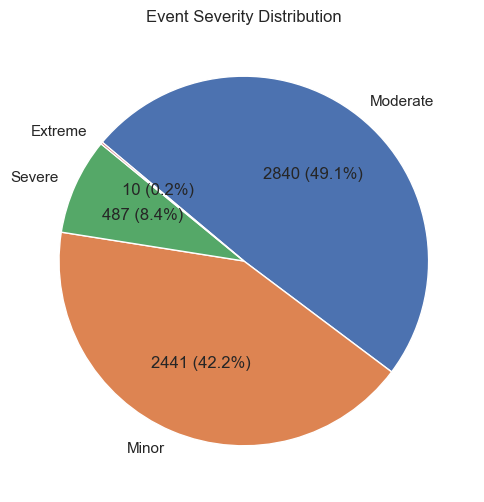

In [35]:
plt.figure(figsize=(12, 6))  # Adjust size as needed
plt.pie(
    severity_counts,
    labels=severity_counts.index,
    autopct=lambda p: f"{int(p/100.*severity_counts.sum())} ({p:.1f}%)",
    startangle=140,
    counterclock=False,
)
plt.title("Event Severity Distribution")
plt.show()

#### Delve into hidden info..(group by Severity and Region)

In [53]:
data["Severity"].unique()

array(['Moderate', 'Minor', 'Extreme', 'Severe', nan], dtype=object)

In [36]:
minor_cases = data[data["Severity"] == "Moderate"].copy()

In [37]:
country_counts = minor_cases["Region"].value_counts()

In [38]:
# Keep the top 3 countries
top_countries = country_counts.nlargest(3)

# Calculate the count for 'Rest'
rest_count = country_counts[3:].sum()

# Create a new Series from the top 3 countries
top_countries_series = top_countries

# Add the 'Rest' category by assigning it directly to the Series
top_countries_series["Rest"] = rest_count

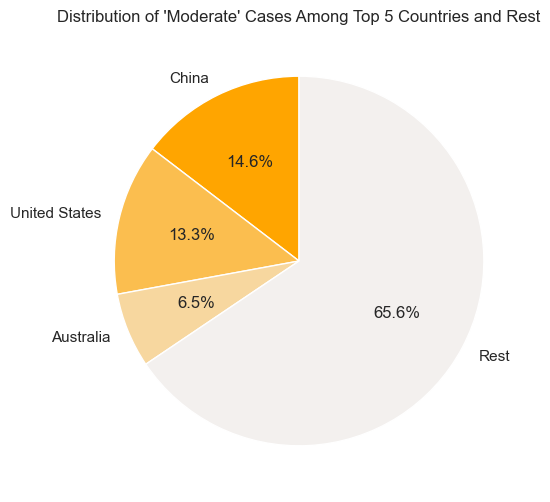

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Apply seaborn style
sns.set(style="white")

# Generate a custom color palette with a gradient effect
# Let's create a gradient from light to darker orange
palette = sns.light_palette("orange", n_colors=len(top_countries_series), reverse=True)

# Create the pie chart with matplotlib, using the custom seaborn color palette
plt.figure(figsize=(10, 6))
plt.pie(
    top_countries_series,
    labels=top_countries_series.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=palette,
)

plt.title("Distribution of 'Moderate' Cases Among Top 5 Countries and Rest")
plt.show()

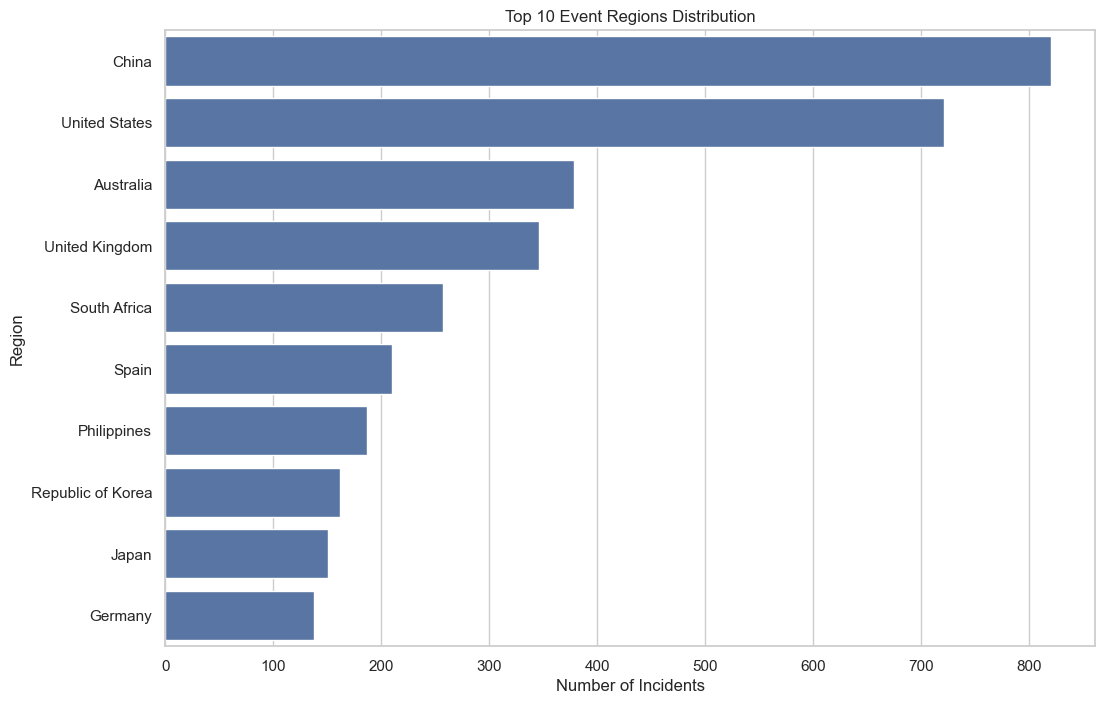

In [52]:
# top 10 regions with the most number of cases
top_regions = data["Region"].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 categories
data_top_regions = data[data["Region"].isin(top_regions)]

# Plot
plt.figure(figsize=(12, 8))  # Adjust size as needed
sns.countplot(
    y="Region",
    data=data_top_regions,
    order=data_top_regions["Region"].value_counts().index,
)
plt.title("Top 10 Event Regions Distribution")
plt.xlabel("Number of Incidents")
plt.ylabel("Region")
plt.show()

In [ ]:
# Count the occurrences of each category and select the top 10
top_categories = data["Category"].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 categories
data_top_categories = data[data["Category"].isin(top_categories)]

# Plot
plt.figure(figsize=(12, 8))  # Adjust size as needed
sns.countplot(
    y="Category",
    data=data_top_categories,
    order=data_top_categories["Category"].value_counts().index,
)
plt.title("Top 10 Event Categories Distribution")
plt.xlabel("Number of Incidents")
plt.ylabel("Category")
plt.show()

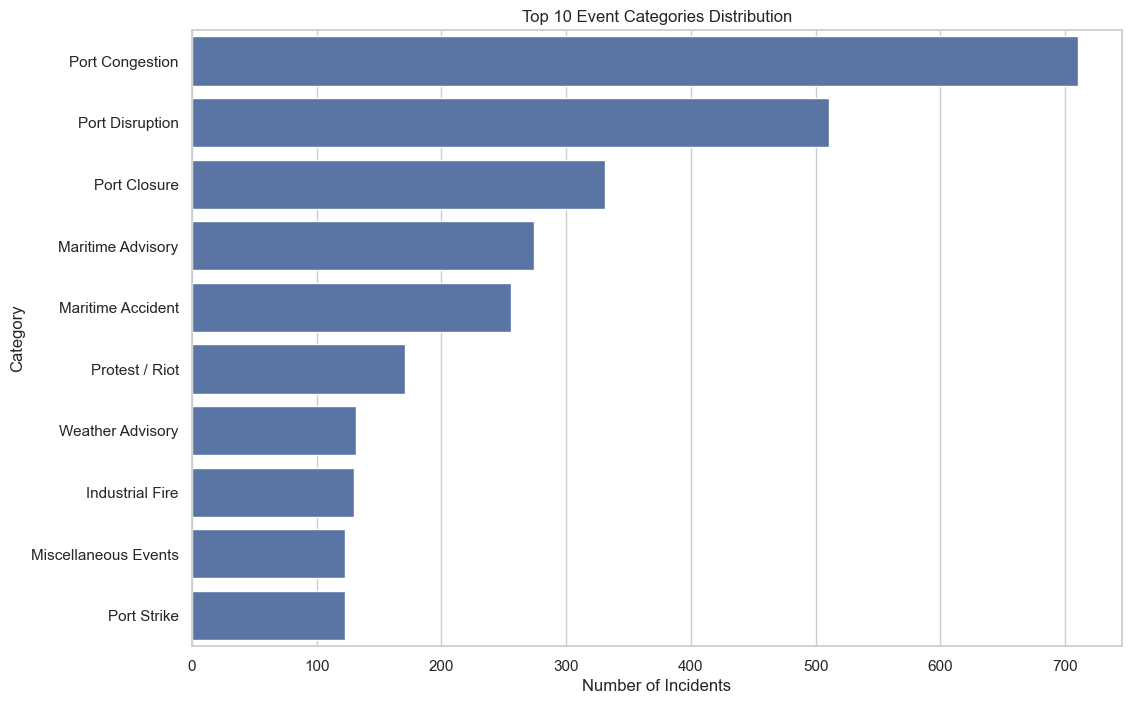

In [49]:
# Count the occurrences of each category and select the top 10
top_categories = data["Category"].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 categories
data_top_categories = data[data["Category"].isin(top_categories)]

# Plot
plt.figure(figsize=(12, 8))  # Adjust size as needed
sns.countplot(
    y="Category",
    data=data_top_categories,
    order=data_top_categories["Category"].value_counts().index,
)
plt.title("Top 10 Event Categories Distribution")
plt.xlabel("Number of Incidents")
plt.ylabel("Category")
plt.show()

#### zoom into countries

In [41]:
# Filter data for China and United States
china_cases = data[data["Region"] == "China"]
us_cases = data[data["Region"] == "United States"]

# Get top 5 event categories for China
china_top_5 = china_cases["Category"].value_counts().nlargest(5)

# Get top 5 event categories for United States
us_top_5 = us_cases["Category"].value_counts().nlargest(5)

In [42]:
# Convert Series to DataFrame
china_plot_data = china_top_5.reset_index().rename(
    columns={"index": "Category", "Category": "Category"}
)
us_plot_data = us_top_5.reset_index().rename(
    columns={"index": "Category", "Category": "Category"}
)

In [43]:
china_plot_data

Category  count
0    Port Congestion    242
1       Port Closure    116
2    Port Disruption     96
3  Maritime Advisory     71
4  Maritime Accident     24

/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_4868/712307362.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax_china = sns.barplot(x='count', y='Category', data=china_plot_data, palette='Oranges_r')


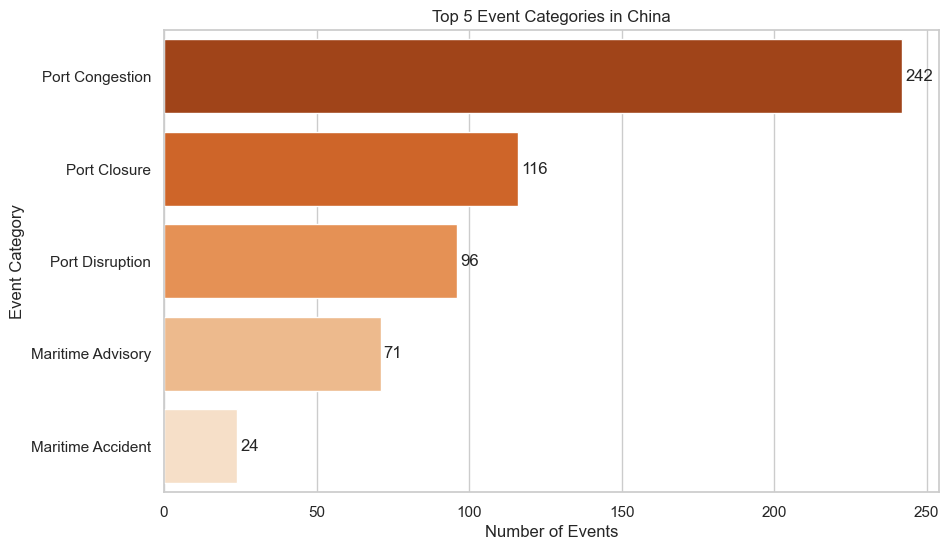

/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_4868/712307362.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax_us = sns.barplot(x='count', y='Category', data=us_plot_data, palette='Blues_r')


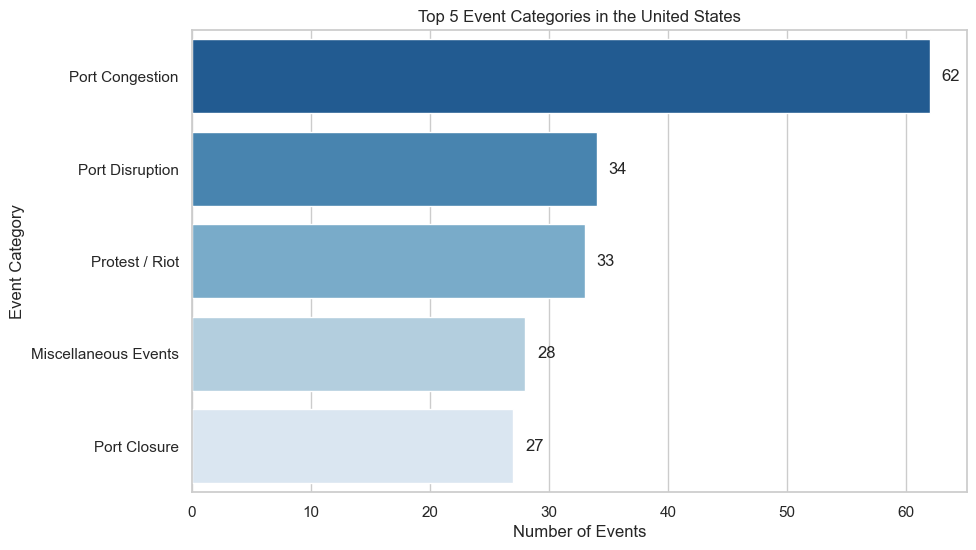

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Apply seaborn style
sns.set_style("whitegrid")

# Plot for China
plt.figure(figsize=(10, 6))
ax_china = sns.barplot(
    x="count", y="Category", data=china_plot_data, palette="Oranges_r"
)
plt.title("Top 5 Event Categories in China")
plt.xlabel("Number of Events")
plt.ylabel("Event Category")

# Loop through the bars and add text annotation
for p in ax_china.patches:
    width = p.get_width()
    plt.text(
        width + 1,  # x position, shifted +1 to the right for spacing
        p.get_y() + p.get_height() / 2,  # y position, at the center of the bar
        f"{int(width)}",  # text label, the count of events
        va="center",
    )  # center alignment

plt.show()

# Plot for United States
plt.figure(figsize=(10, 6))
ax_us = sns.barplot(x="count", y="Category", data=us_plot_data, palette="Blues_r")
plt.title("Top 5 Event Categories in the United States")
plt.xlabel("Number of Events")
plt.ylabel("Event Category")

# Loop through the bars and add text annotation for the US plot
for p in ax_us.patches:
    width = p.get_width()
    plt.text(
        width + 1,  # x position, shifted +1 to the right for spacing
        p.get_y() + p.get_height() / 2,  # y position, at the center of the bar
        f"{int(width)}",  # text label, the count of events
        va="center",
    )  # center alignment

plt.show()